In [114]:
# Loel var 2

'Работа с интерактивными блокнотами и файлами'
Цели лабораторной работы:
Освоить работу с Excel-файлами средствами Python.
Научиться использовать библиотеку openpyxl для чтения и записи данных.
Научиться строить столбчатые диаграммы с помощью matplotlib.
Развить навыки обработки и визуализации табличных данных.

Задачи лабораторной работы:
Считать данные из Excel-файла с результатами студентов.
Выполнить вычисления (средние, максимальные, групповые показатели).
Построить столбчатые диаграммы по заданным вариантам.
Подписать оси, добавить заголовки и легенды к графикам.
Сохранить результаты и визуализации в Jupyter Notebook.

Ход работы
1. Изучите теоретические сведения
2. Выполните общие и индивидуальные задания в тетради для лабораторных и
практических работ или на рабочем компьютере
3. Сдайте выполненные задание в Classroom или сдать тетрадь преподавателю
4. Защитить выполненные задания



Импорт библиотек

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
from openpyxl import load_workbook


Загрузка данных

In [116]:
workbook = load_workbook('students.xlsx')

sheet_grades = workbook["Оценки"]
sheet_groups = workbook["Группы"]

students_grades = {}

for row in sheet_grades.iter_rows(min_row=2, values_only=True):
    if row[0] and row[1] and row[2] and row[3]:
        math = row[1]
        physics = row[2]
        inform = row[3]
        
        students_grades[row[0]] = {
            'Математика': math,
            'Физика': physics,
            'Информатика': inform
        }

students_groups = {}

# Обрабатываем данные о группах
for row in sheet_groups.iter_rows(min_row=2, values_only=True):
    if row[0] and row[1] is not None:
        fio = row[0]
        group = row[1]
        students_groups[fio] = group

complete_data = []
for fio, marks in students_grades.items():
    if fio in students_groups:
        complete_data.append({
            'ФИО': fio,
            'Группа': students_groups[fio],
            'Оценки': marks
        })



Расчет среднего балла для каждого студента

In [117]:
for student_data in complete_data:
    marks = student_data['Оценки']
    average_bal = (marks['Математика'] + marks['Физика'] + marks['Информатика']) / 3
    student_data['Средний_балл'] = round(average_bal, 2)




Построение столбчатой диаграммы

C:\Users\LoelSem_89\AppData\Local\Temp\ipykernel_11592\1564885768.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


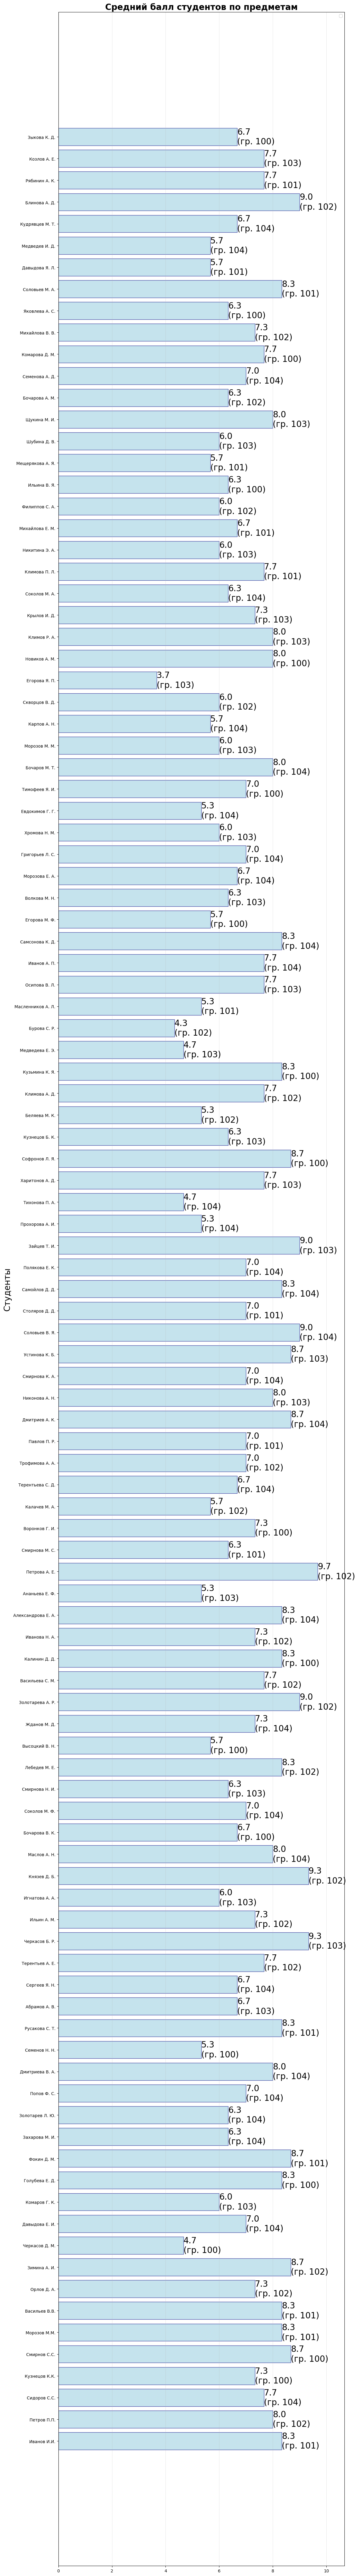

In [118]:
names = [student['ФИО'] for student in complete_data]
marks = [student['Средний_балл'] for student in complete_data]
groups = [student['Группа'] for student in complete_data]


# Создание графика
plt.figure(figsize=(12, len(names) * 0.8))
bars = plt.barh(names, marks, color='lightblue', edgecolor='navy', alpha=0.7)

# Настройка внешнего вида
plt.title('Средний балл студентов по предметам', fontsize=20, fontweight='bold')
plt.ylabel('Студенты', fontsize=20)
plt.grid(axis='x', alpha=0.3)
plt.xlim(0, max(marks) + 1)

# Добавление подписей на столбцы
for bar, балл, group in zip(bars, marks, groups):
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
             f'{балл:.1f}\n(гр. {group})',
             ha='left', va='center', fontsize=20)

plt.legend()

plt.tight_layout()
plt.show()